1. 사용자가 키워드를 검색할 컬럼을 선택합니다.

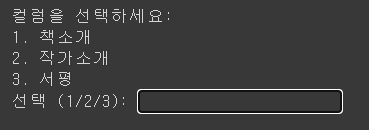

2. 컬럼 선택 후 원하는 키워드를 입력합니다.

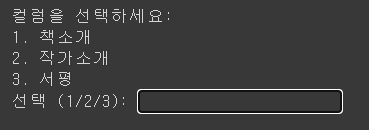

3. 해당 키워드를 가장 많이 보유한 상위 5권의 책 제목이 출력됩니다.

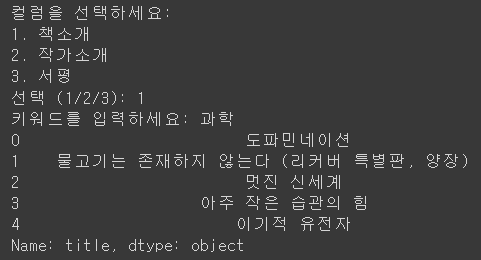

In [ ]:

def find_book(file_path):
    import csv
    from collections import Counter
    import pandas as pd
    # 사용자가 선택할 수 있는 컬럼 목록 및 한글 표시
    column_choices = {
        '책소개': 'introduction',
        '작가소개': 'author_info',
        '서평': 'book_rev'
    }

    # 사용자에게 선택지 제시
    print("컬럼을 선택하세요:")
    for idx, (kor_name, eng_name) in enumerate(column_choices.items(), 1):
        print(f"{idx}. {kor_name}")

    # 사용자 입력 받기
    choice = int(input("선택 (1/2/3): "))
    selected_column = column_choices[list(column_choices.keys())[choice - 1]]

    # 키워드 입력
    keyword = input("키워드를 입력하세요: ")
    # CSV 파일 열기
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        # 선택된 컬럼에서 키워드를 가장 많이 포함하는 값을 찾기 위해 Counter 사용
        keyword_counts = Counter()
        # 행마다 선택된 컬럼의 값을 확인하여 키워드가 포함되어 있는지 확인
        for row in reader:
            selected_text = row[selected_column]
            if keyword.lower() in selected_text.lower():
                isbn = row['isbn']
                keyword_counts[isbn] += 1

    # 가장 많은 키워드를 가진 상위 5개의 ISBN 찾기
    top_5_isbn = [isbn for isbn, _ in keyword_counts.most_common(5)]
    # CSV 파일 다시 열기
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        headers = reader.fieldnames
        # 결과를 저장할 빈 데이터프레임 생성
        result_rows = pd.DataFrame(columns=headers, dtype=str)
        # 행마다 top_5_isbn에 해당하는 행을 찾아서 결과 데이터프레임에 추가
        for row in reader:
            if row['isbn'] in top_5_isbn:
                result_rows = pd.concat([result_rows, pd.DataFrame([row], columns=headers)], ignore_index=True)
    # 결과 데이터프레임에서 isbn과 title 열 선택 및 중복 제거
    result_subset = result_rows[['isbn', 'title']]
    result_unique = result_subset.drop_duplicates(subset=['isbn'])
    result_unique = result_unique['title']
    return result_unique

# 함수 실행
result = find_book('merged_df.csv')
print(result)
